#### Visualizing lmc and mw trajectory data

In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

file_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(file_dir, os.pardir))
mw_orbit_path = os.path.join(project_root, 'data', 'raw', 'trajectories', 'GC21M2b1_orbit_mw.txt')
lmc_orbit_path = os.path.join(project_root, 'data', 'raw', 'trajectories', 'GC21M3b1_orbit_lmc.txt')

col_names = ['time', 'x', 'y', 'z', 'vx', 'vy', 'vz']
mw_df = pd.read_csv(mw_orbit_path, delim_whitespace=True, header=None, names=col_names)
lmc_df = pd.read_csv(lmc_orbit_path, delim_whitespace=True, header=None, names=col_names)

print("setup complete.")

setup complete.


/tmp/ipykernel_16966/3029331054.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mw_df = pd.read_csv(mw_orbit_path, delim_whitespace=True, header=None, names=col_names)
/tmp/ipykernel_16966/3029331054.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lmc_df = pd.read_csv(lmc_orbit_path, delim_whitespace=True, header=None, names=col_names)


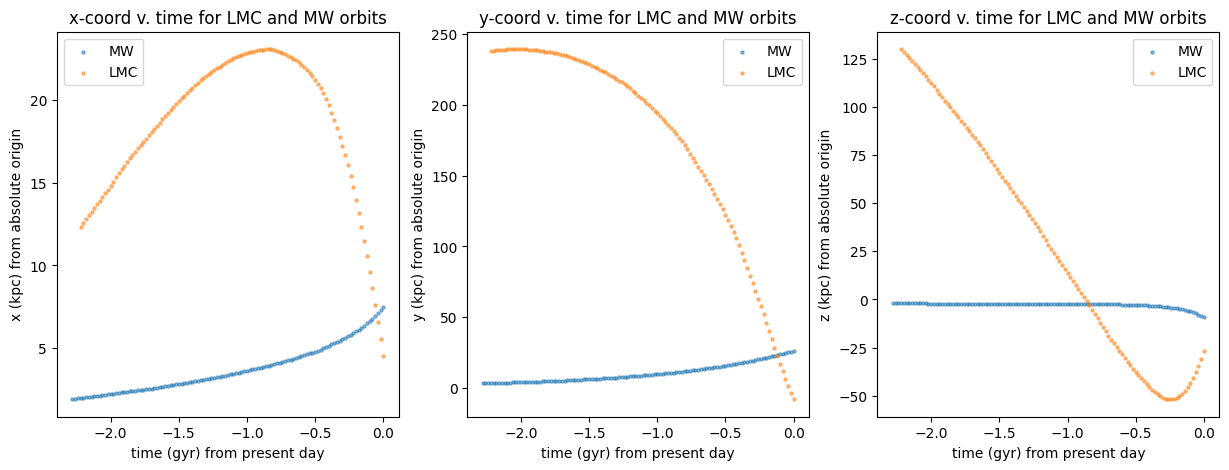

In [3]:
#subplots for x,y,z
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

#x
ax1.scatter(mw_df['time'], mw_df['x'], s=5, alpha=0.5, label='MW')
ax1.scatter(lmc_df['time'], lmc_df['x'], s=5, alpha=0.5, label='LMC')
ax1.set_title("x-coord v. time for LMC and MW orbits")
ax1.set_xlabel("time (gyr) from present day")
ax1.set_ylabel("x (kpc) from absolute origin")
ax1.legend()

#y
ax2.scatter(mw_df['time'], mw_df['y'], s=5, alpha=0.5, label='MW')
ax2.scatter(lmc_df['time'], lmc_df['y'], s=5, alpha=0.5, label='LMC')
ax2.set_title("y-coord v. time for LMC and MW orbits")
ax2.set_xlabel("time (gyr) from present day")
ax2.set_ylabel("y (kpc) from absolute origin")
ax2.legend()

#z
ax3.scatter(mw_df['time'], mw_df['z'], s=5, alpha=0.5, label='MW')
ax3.scatter(lmc_df['time'], lmc_df['z'], s=5, alpha=0.5, label='LMC')
ax3.set_title("z-coord v. time for LMC and MW orbits")
ax3.set_xlabel("time (gyr) from present day")
ax3.set_ylabel("z (kpc) from absolute origin")
ax3.legend()

plt.show()

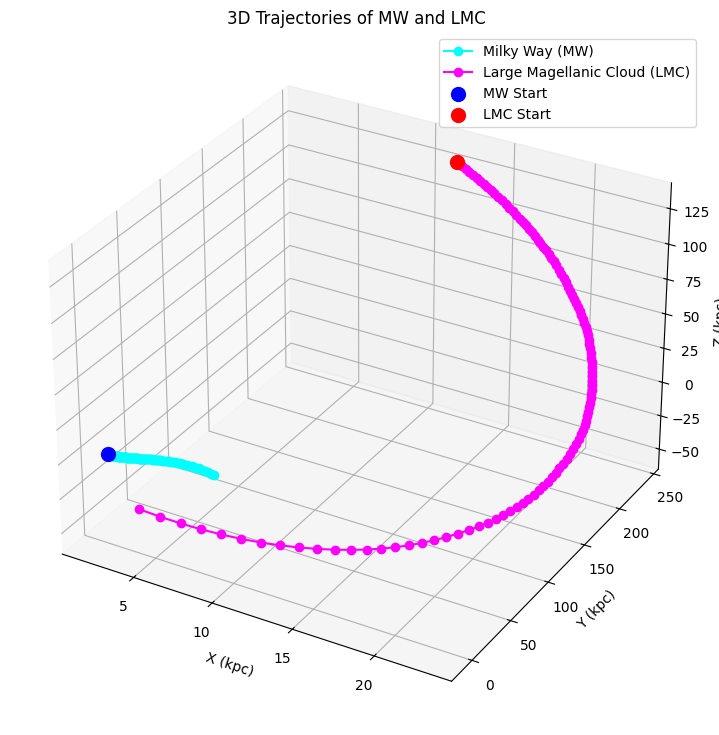

In [5]:
# 3d plot of trajectory

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# plot trajectories
ax.plot(mw_df['x'], mw_df['y'], mw_df['z'], 'o-', label='Milky Way (MW)', color='cyan')
ax.plot(lmc_df['x'], lmc_df['y'], lmc_df['z'], 'o-', label='Large Magellanic Cloud (LMC)', color='magenta')

# mark the start and end points
ax.scatter(mw_df['x'].iloc[0], mw_df['y'].iloc[0], mw_df['z'].iloc[0], color='blue', s=100, label='MW Start')
ax.scatter(lmc_df['x'].iloc[0], lmc_df['y'].iloc[0], lmc_df['z'].iloc[0], color='red', s=100, label='LMC Start')

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_title('3D Trajectories of MW and LMC')
ax.legend()
plt.show()

#### Generate curves of fit for interpolation using MW and LMC trajectories

[2.61145861 5.89079445]
curve fits completed.


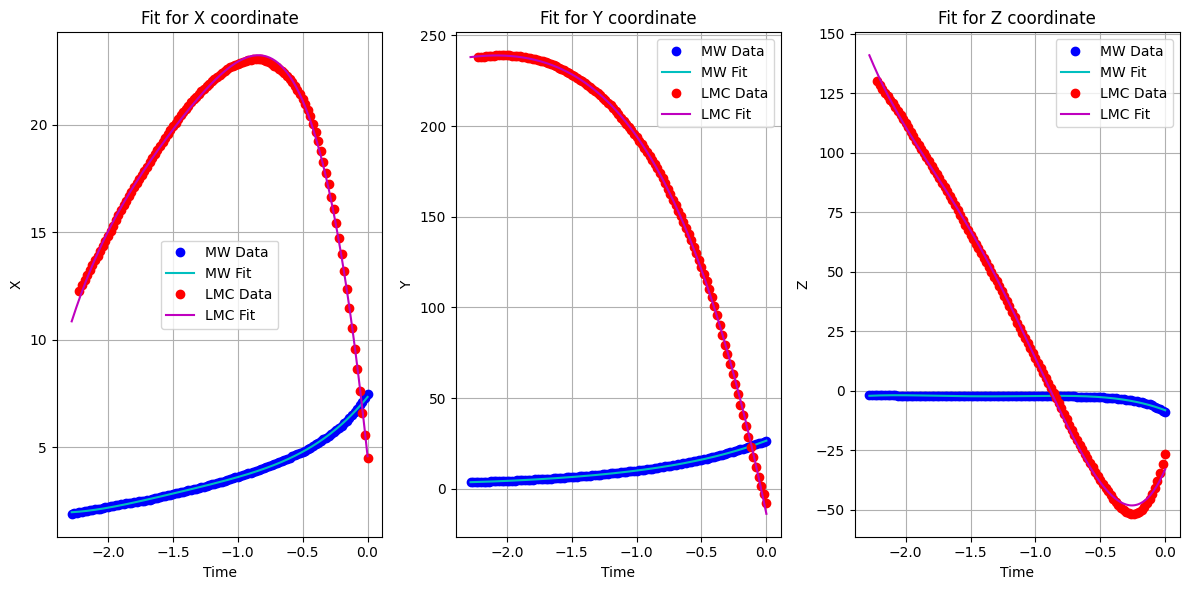

In [ ]:
def poly_func(t, a, b, c, d, e):
    return a*t**4 + b*t**3 + c*t**2 + d*t + e

mw_popt_x, _ = curve_fit(poly_func, mw_df['time'], mw_df['x'])
mw_popt_y, _ = curve_fit(poly_func, mw_df['time'], mw_df['y'])
mw_popt_z, _ = curve_fit(poly_func, mw_df['time'], mw_df['z'])

lmc_popt_x, _ = curve_fit(poly_func, lmc_df['time'], lmc_df['x'])
lmc_popt_y, _ = curve_fit(poly_func, lmc_df['time'], lmc_df['y'])
lmc_popt_z, _ = curve_fit(poly_func, lmc_df['time'], lmc_df['z'])

print("curve fits completed.")

time_smooth = np.linspace(mw_df['time'].min(), mw_df['time'].max(), 200)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(mw_df['time'], mw_df['x'], 'bo', label='MW Data')
plt.plot(time_smooth, poly_func(time_smooth, *mw_popt_x), 'c-', label='MW Fit')
plt.plot(lmc_df['time'], lmc_df['x'], 'ro', label='LMC Data')
plt.plot(time_smooth, poly_func(time_smooth, *lmc_popt_x), 'm-', label='LMC Fit')
plt.title('Fit for X coordinate')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(mw_df['time'], mw_df['y'], 'bo', label='MW Data')
plt.plot(time_smooth, poly_func(time_smooth, *mw_popt_y), 'c-', label='MW Fit')
plt.plot(lmc_df['time'], lmc_df['y'], 'ro', label='LMC Data')
plt.plot(time_smooth, poly_func(time_smooth, *lmc_popt_y), 'm-', label='LMC Fit')
plt.title('Fit for Y coordinate')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(mw_df['time'], mw_df['z'], 'bo', label='MW Data')
plt.plot(time_smooth, poly_func(time_smooth, *mw_popt_z), 'c-', label='MW Fit')
plt.plot(lmc_df['time'], lmc_df['z'], 'ro', label='LMC Data')
plt.plot(time_smooth, poly_func(time_smooth, *lmc_popt_z), 'm-', label='LMC Fit')
plt.title('Fit for Z coordinate')
plt.xlabel('Time')
plt.ylabel('Z')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
